# 1. 시각화
'실제 주가 데이터'와 '크롤링 데이터의 긍부정 score'와  비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import copy

pd.options.mode.chained_assignment = None  # 경고 숨기기

%matplotlib inline

### 실제 주가 데이터


In [2]:
# 실제 주가 데이터
stock = pd.read_csv('hybe_stock_data.csv')
stock['Date'] = pd.to_datetime(stock['Date'])

### 기존 긍부정 계산 데이터

In [3]:
news = pd.read_csv('hybe_04.SentimentWord_01.csv')
news.head(3)
# 날짜별로 감정점수를 다 더하고 인덱스 초기화
groupby_news = news.groupby('Date')[['Score']].sum().reset_index()
# 날짜가 원래 object 형식이었는데 datetime으로 변환 (그래프 그릴 때 x축 편집에 필요)
groupby_news['Date'] = pd.to_datetime(groupby_news['Date'])
merged_df = pd.merge(groupby_news, stock[['Date', 'Close']], on='Date')
merged_df.head()

,Date,Score,Close
0,2023-06-01,-7,277500.0
1,2023-06-02,29,270000.0
2,2023-06-05,25,265000.0
3,2023-06-07,15,269000.0
4,2023-06-08,12,268000.0


# 비교

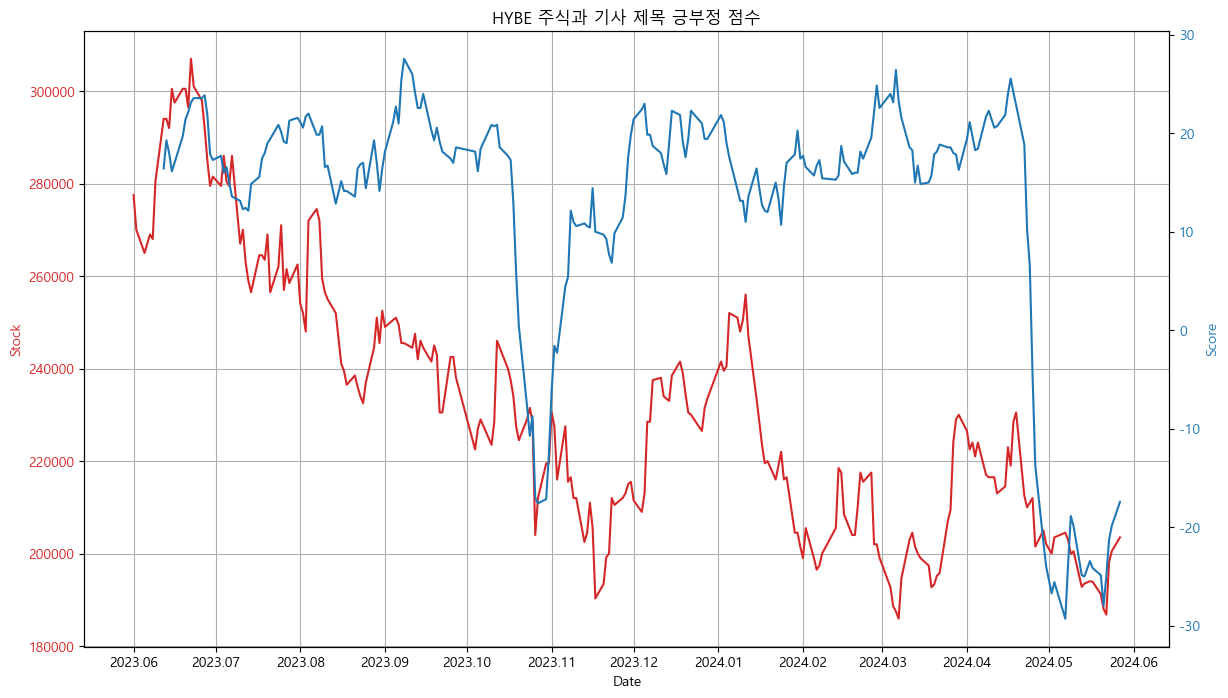

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 그리기 설정
fig, ax1 = plt.subplots(figsize=(14, 8))

# stock : 첫 번째 데이터 세트 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock', color=color)
ax1.plot(stock['Date'], stock['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 크롤링 : 두 번째 데이터 세트 (오른쪽 y축)
smoothed_scores = merged_df['Score'].rolling(window=7).mean()
ax2 = ax1.twinx()  # 같은 x축을 공유하는 새로운 축 생성
color = 'tab:blue'
ax2.set_ylabel('Score', color=color)
ax2.plot(merged_df['Date'], smoothed_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)


# 타이틀과 그리드 설정
ax1.set_title('HYBE 주식과 기사 제목 긍부정 점수')
plt.xticks(rotation=45)
ax1.grid(True)

# X축 날짜 포맷 설정
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # 매달 1일만 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))  # 날짜 포맷

# 그래프 표시
plt.show()

---
# 2. 추가 감정 라벨링 후 시각화

### (1) 기존 Word_dict에 추가

In [6]:
# 감정 사전 데이터 불러오기
# from google.colab import files

# uploaded = files.upload()
word_dict_df = pd.read_csv("단어합본.csv")
word_dict_df = word_dict_df.drop(columns=['Unnamed: 0'])
word_dict = word_dict_df.set_index('word').to_dict()['polarity']

In [7]:
### 워드 클라우드, 뉴스 제목 등을 참고해서 점수 매핑

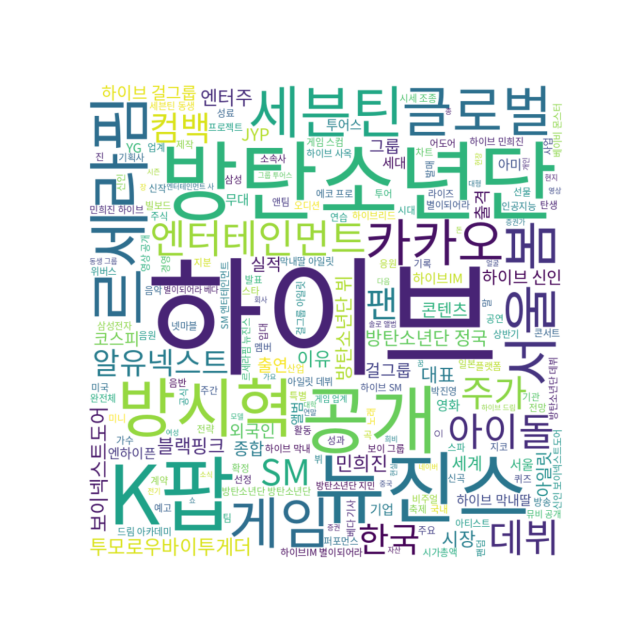

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 저장된 이미지 파일 경로
image_path = 'wordcloud_zero.png'

# 이미지 불러오기
img = mpimg.imread(image_path)

# 이미지 표시
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()


In [9]:
plus2_word = ['오름세', '낙관', '선순환', '긍정적', '성료', '최선호주']
plus1_word = ['세련', '천재', '톱티어', '큐티', '득표', '격려', '보강', '데뷔', '선심', '베스트', '우승', '업그레이드', '센세이션', '치유', '팔방미인', '성사', '크리에이티브', '사명감', '이정표', '구원투수', '촉구', '감사패', '자유', '다양', '블루칩', '보완', '히트', '황금', '장밋빛', '발돋움', '만끽', '환호', '실현', '소통', '영감', '힐링', '열심', '사명', '실력파', '황금빛', '성행', '우호', '자부심', '컴백', '활동', '출격', '정규', '응원']

minus2_word = ['격동', '협공', 'x저씨', '칼부림', '부패', '격전지', '왜곡', '발뺌', '악명', '엄단', '혐한', '철권통치', '패망', '낙후', '악행', '사기극', '미투', '추행', '배임죄', '삭감', '혐의', '사재기', '급락세', '구속']
minus1_word = ['불응', '수색', '공작', '촉구', '이혼', '철거', '경합', '대출액', '무력', '으름장', '가시밭길', '심려', '기시감', '과잉', '무기', '연루설', '결여', '인색', '추궁', '막무가내', '격변', '상습', '감시', '내막', '방관', '유착', '공백기', '흠집', '강등', '급성', '방해', '극우', '주술', '피의자', '불리', '냉소', '골칫거리', '불쾌', '깜깜이', '폭력배', '불모지', '집착', '지지부진', '뒷맛', '흑색선전', '볼모', '상실', '의문', '불량', '조소', '편향', '압류', '밀수', '사이버렉카', '탈퇴', '비굴', '음치', '만행', '꼰대', '총격전', '의구심', '수치심', '역습', '조종', '공개매수', '심문', '배임', '부인', '사이비']

word_lists = [minus2_word, minus1_word, plus1_word, plus2_word]
values = [-2, -1, 1, 2]

# 딕셔너리에 단어들을 추가
for lst, value in zip(word_lists, values):
    for word in lst:
        word_dict[word] = value

### (2) 기존 긍부정 계산 데이터에 추가

In [10]:
def find_sentiment_words(tokens, word_dict):
    pos_words = []
    neg_words = []
    zero_words = []
    sentiment_words = []

    total_polarity = 0

    for token in tokens.split():  # 각 단어를 공백 기준으로 분리
        if token in word_dict:
            sentiment_words.append(token)
            if word_dict[token] > 0:
                pos_words.append(token)
                total_polarity += word_dict[token]
            elif word_dict[token] < 0:
                neg_words.append(token)
                total_polarity += word_dict[token]
            else:
                zero_words.append(token)
        else:
            zero_words.append(token)

    return sentiment_words, pos_words, neg_words, zero_words, total_polarity

# 예제 데이터프레임과 word_dict를 사용하여 결과를 계산
sentiment_results = news['Stop_tokens'].apply(lambda x: find_sentiment_words(x, word_dict))

# 결과 출력
sentiment_results


0       ([데뷔, 프로그램], [데뷔], [], [하이브, 걸그룹, 서바이벌, 프로그램, ...
1       ([활동, 중단, 직원, 주식, 매도, 적발], [활동], [중단, 매도, 적발],...
2       ([정보, 직원, 후회, 사태, 이후, 급등, 카카오, 하락], [이후, 급등], ...
3          ([부진, 갈등, 악재], [], [부진, 갈등, 악재], [엑소, SM], -4)
4       ([주식, 거래, 절반, 정보], [], [절반], [하이브, 주식, 공정, 거래,...
                              ...                        
9183                      ([], [], [], [이희주, 완벽, 핸섬가], 0)
9184    ([처분], [], [처분], [뉴진스, 앨범, 만장, 민희진, 해임, 이번, 결론...
9185    ([공격, 보호, 표절, 고소], [보호], [공격, 표절, 고소], [민희진, 아...
9186                                ([], [], [], [공승], 0)
9187            ([], [], [], [이성민, 이희주, 공승, 박지화, 웃음꽃], 0)
Name: Stop_tokens, Length: 9188, dtype: object

In [11]:
news_addition = copy.copy(news)
news_addition['Sentiment_Word'] = sentiment_results.apply(lambda x: ', '.join(x[0]))
news_addition['Pos_Word'] = sentiment_results.apply(lambda x: ', '.join(x[1]))
news_addition['Neg_Word'] = sentiment_results.apply(lambda x: ', '.join(x[2]))
news_addition['Zero_Word'] = sentiment_results.apply(lambda x: ', '.join(x[3]))
news_addition['Score'] = sentiment_results.apply(lambda x: x[4])

## 추가 라벨링 후 비교

In [12]:
# 날짜별로 감정점수를 다 더하고 인덱스 초기화
groupby_news_addition = news_addition.groupby('Date')[['Score']].sum().reset_index()
# 날짜가 원래 object 형식이었는데 datetime으로 변환 (그래프 그릴 때 x축 편집에 필요)
groupby_news_addition['Date'] = pd.to_datetime(groupby_news_addition['Date'])
merged_df_addition = pd.merge(groupby_news_addition, stock[['Date', 'Close']], on='Date')
merged_df_addition.head()

,Date,Score,Close
0,2023-06-01,-2,277500.0
1,2023-06-02,37,270000.0
2,2023-06-05,39,265000.0
3,2023-06-07,17,269000.0
4,2023-06-08,14,268000.0


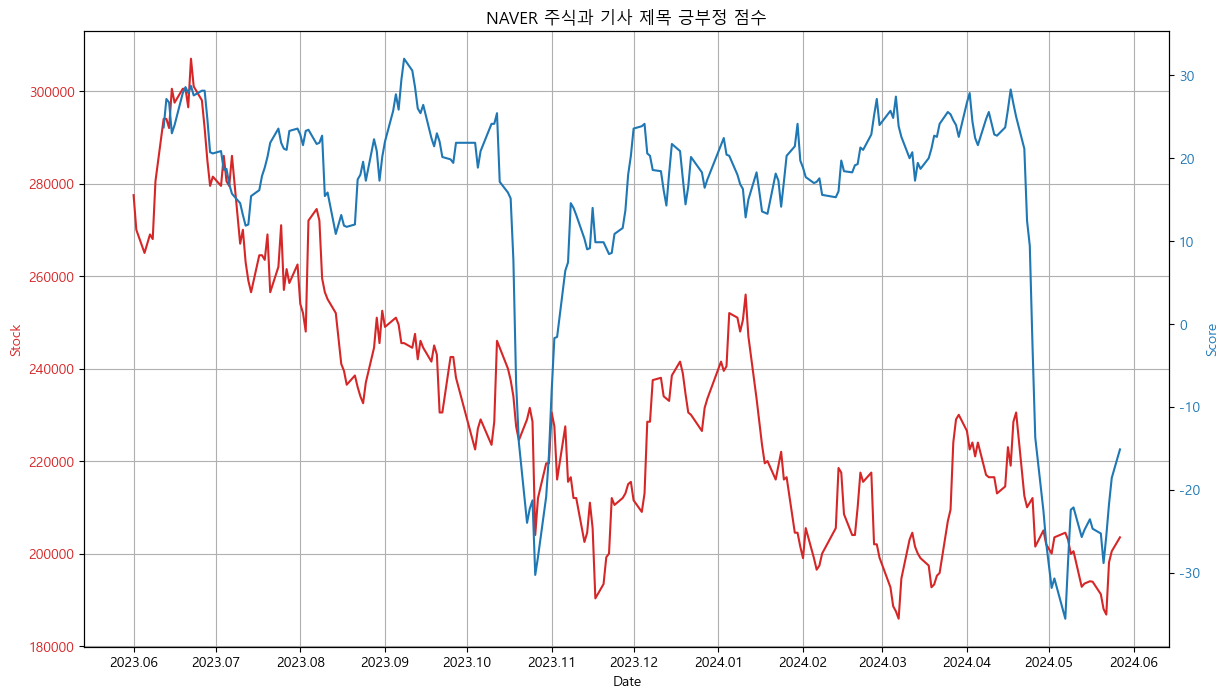

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 그리기 설정
fig, ax1 = plt.subplots(figsize=(14, 8))

# stock : 첫 번째 데이터 세트 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock', color=color)
ax1.plot(stock['Date'], stock['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 크롤링 : 두 번째 데이터 세트 (오른쪽 y축)
smoothed_scores = merged_df_addition['Score'].rolling(window=7).mean()
ax2 = ax1.twinx()  # 같은 x축을 공유하는 새로운 축 생성
color = 'tab:blue'
ax2.set_ylabel('Score', color=color)
ax2.plot(merged_df_addition['Date'], smoothed_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)


# 타이틀과 그리드 설정
ax1.set_title('NAVER 주식과 기사 제목 긍부정 점수')
plt.xticks(rotation=45)
ax1.grid(True)

# X축 날짜 포맷 설정
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # 매달 1일만 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))  # 날짜 포맷

# 그래프 표시
plt.show()

- 추가 라벨링 전
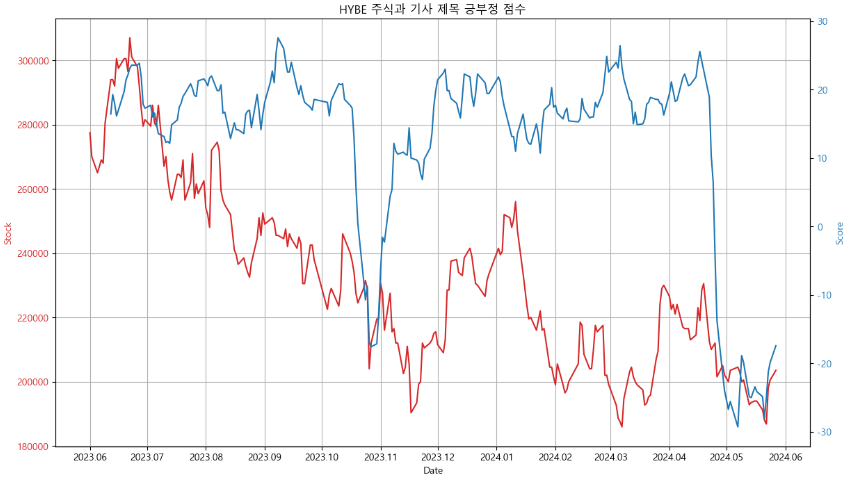

In [ ]:
# 분석 결과
### 크게 차이 없음
### => 모델링으로 극복